In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp

# Loading the Dataset

In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/data-science"
pd.options.display.max_colwidth = 100
df = pd.read_csv('../Data/ebay.csv',sep=";")
df.columns = ['seller','buyer_segment','full_category','category','auction_duration','start_price','total_bids','first_2d_bids','last_2d_bids','final_price','final_price_cat_pctl','last_7d_searches','last_7d_item_views','last_7d_purchases','last_2d_searches','last_2d_item_views','last_2d_purchases','after_7d_value','after_7d_purchases']
df.head()

/content/drive/MyDrive/Colab Notebooks/data-science


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,seller,buyer_segment,full_category,category,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
0,20762,2. Frequent High Spenders,Sporting Goods:Hunting:Gun Parts:Rifle,Gun Parts,7.0,36.0,3.0,0.0,1.0,40.0,0.629832,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"0,,,,,,,"
1,20762,2. Frequent High Spenders,Cell Phones & Accessories:Cell Phones & Smartphones,Cell Phones & Smartphones,7.0,83.0,3.0,0.0,3.0,84.0,0.346105,0.0,2.0,0.0,0.0,0.0,0.0,0.0,"0,,,,,,,"
2,20762,2. Frequent High Spenders,Cell Phones & Accessories:Cell Phones & Smartphones,Cell Phones & Smartphones,7.0,83.0,7.0,0.0,7.0,90.0,0.359755,0.0,2.0,0.0,0.0,0.0,0.0,0.0,"0,,,,,,,"
3,175965,4. Infrequent High Spenders,"Clothing, Shoes & Accessories:Women's Shoes:Flats & Oxfords",Flats & Oxfords,3.0,56.0,23.0,9.0,22.0,91.0,0.956078,8.0,0.0,0.0,0.0,0.0,0.0,0.0,"0,,,,,,"
4,217544,5. Infrequent Mid Spenders,Cameras & Photo:Lenses & Filters:Lenses,Lenses,7.0,300.0,21.0,5.0,15.0,465.0,0.810785,3.0,0.0,0.0,0.0,0.0,0.0,0.0,"0,,,,,,,"


# Dealing with bad formatted entries and null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695729 entries, 0 to 695728
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller                695729 non-null  object 
 1   buyer_segment         695632 non-null  object 
 2   full_category         695632 non-null  object 
 3   category              695632 non-null  object 
 4   auction_duration      695632 non-null  float64
 5   start_price           695632 non-null  float64
 6   total_bids            695632 non-null  float64
 7   first_2d_bids         695632 non-null  float64
 8   last_2d_bids          695632 non-null  float64
 9   final_price           695632 non-null  float64
 10  final_price_cat_pctl  695632 non-null  float64
 11  last_7d_searches      695632 non-null  float64
 12  last_7d_item_views    695632 non-null  float64
 13  last_7d_purchases     695632 non-null  float64
 14  last_2d_searches      695632 non-null  float64
 15  

Sum of null values for each column

In [4]:
df.isnull().sum()

seller                   0
buyer_segment           97
full_category           97
category                97
auction_duration        97
start_price             97
total_bids              97
first_2d_bids           97
last_2d_bids            97
final_price             97
final_price_cat_pctl    97
last_7d_searches        97
last_7d_item_views      97
last_7d_purchases       97
last_2d_searches        97
last_2d_item_views      97
last_2d_purchases       97
after_7d_value          97
after_7d_purchases      97
dtype: int64

Let's check the null values and see how they look like.

In [5]:
isna = pd.isna(df.buyer_segment)
df[isna]

,seller,buyer_segment,full_category,category,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
545,"59830;3. Frequent Low/Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17109,"146355;4. Infrequent High Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23488,"96006;5. Infrequent Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;7;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28043,"120701;6. Infrequent Low Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28721,"215706;3. Frequent Low/Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559380,"44345;5. Infrequent Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;7;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561028,"62800;3. Frequent Low/Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561034,"62800;3. Frequent Low/Mid Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644282,"114315;6. Infrequent Low Spenders;Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks;Quilting;7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yeap, we need to get rid of this entries. But if you check what is actually in seller column, you can see its whole entry put in one column. So instead of removing them, maybe we can restore the data from that column.

In [6]:
nas = df[isna]
i_nas = nas.index
for i,entry in enumerate(nas.seller.values):
  datas = entry.split(";")
  df.loc[i_nas[i],['seller','buyer_segment','full_category','category','auction_duration','start_price',
                   'total_bids','first_2d_bids','last_2d_bids','final_price','final_price_cat_pctl',
                   'last_7d_searches','last_7d_item_views','last_7d_purchases','last_2d_searches',
                   'last_2d_item_views','last_2d_purchases','after_7d_value','after_7d_purchases']] = [data for data in datas]
  


In [7]:
df[isna]


,seller,buyer_segment,full_category,category,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
545,59830,3. Frequent Low/Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,19.99,1,0,1,20.00,.685081,25,43,0,3,14,0,.00,"0,,,,,,,"
17109,146355,4. Infrequent High Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,5,14.99,12,2,10,31.00,.878607,0,4,0,0,0,0,.00,"0,,,,,,,"
23488,96006,5. Infrequent Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,40.00,2,0,2,41.00,.932794,4,12,0,0,0,0,.00,"0,,,,,,,"
28043,120701,6. Infrequent Low Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,34.00,1,1,0,34.00,.894441,7,2,0,0,0,0,.00,"0,,,,,,,"
28721,215706,3. Frequent Low/Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,19.99,2,1,0,21.00,.731879,0,0,0,0,0,0,.00,"0,,,,,,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559380,44345,5. Infrequent Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,.99,10,1,5,22.00,.752287,0,2,0,0,1,0,.00,"0,,,,,,,"
561028,62800,3. Frequent Low/Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,1.99,1,0,1,2.00,.043983,0,44,0,0,11,0,.00,"0,,,,,,,"
561034,62800,3. Frequent Low/Mid Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,2.99,1,0,1,3.00,.084448,0,60,0,0,9,0,.00,"0,,,,,,,"
644282,114315,6. Infrequent Low Spenders,"Crafts:Quilting:Quilt Tops & Blocks:2"" Quilt Blocks",Quilting,7,20.00,1,0,1,20.00,.685081,2,0,0,0,0,0,.00,"0,,,,,,,"


Now that we don't have any null value issues, its time to check the datatypes and noises in the columns. Last column of the dataset has a noise. The commas should be taken care of. In below you can see even the values are same because of they have different numbers of commas, they are being treated as different.

In [8]:
df['after_7d_purchases'].value_counts()

0,,,,,,,    352716
0,,,,,,     229654
0,,,,,       48443
1,,,,,,,     12672
0,,,,        11890
             ...  
47,,,,,,         1
46,,,,,          1
34,,,,,          1
12,,,,           1
24,,,,,          1
Name: after_7d_purchases, Length: 204, dtype: int64

In [9]:
x = []
for data in df['after_7d_purchases'].values:
  x.append(float(data.strip(",\"")))
last = pd.Series(x,copy = False, dtype=np.float16)
df['after_7d_purchases'] = last


In [10]:
df.after_7d_purchases.value_counts()

0.0      650237
1.0       24005
2.0        8443
3.0        3933
4.0        2145
          ...  
486.0         1
440.0         1
51.0          1
54.0          1
899.0         1
Name: after_7d_purchases, Length: 75, dtype: int64

In [11]:
df.after_7d_purchases.max()

899.0

In [12]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [13]:
df.describe(include='all')

,seller,buyer_segment,full_category,category,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
count,695729,695729,695729,695729,695729.0,695729.00,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0
unique,242108,6,11936,3214,9.0,5452.00,135.0,108.0,107.0,2338.0,149493.0,610.0,1521.0,81.0,269.0,626.0,41.0,8339.0,NaN
top,42447,3. Frequent Low/Mid Spenders,Cell Phones & Accessories:Cell Phones & Smartphones,Cell Phones & Smartphones,7.0,0.99,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
freq,103,184372,28240,28240,482892.0,92236.00,229387.0,378392.0,209451.0,32583.0,24170.0,426012.0,165392.0,647492.0,591433.0,391186.0,677229.0,650150.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695729 entries, 0 to 695728
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller                695729 non-null  object 
 1   buyer_segment         695729 non-null  object 
 2   full_category         695729 non-null  object 
 3   category              695729 non-null  object 
 4   auction_duration      695729 non-null  object 
 5   start_price           695729 non-null  object 
 6   total_bids            695729 non-null  object 
 7   first_2d_bids         695729 non-null  object 
 8   last_2d_bids          695729 non-null  object 
 9   final_price           695729 non-null  object 
 10  final_price_cat_pctl  695729 non-null  object 
 11  last_7d_searches      695729 non-null  object 
 12  last_7d_item_views    695729 non-null  object 
 13  last_7d_purchases     695729 non-null  object 
 14  last_2d_searches      695729 non-null  object 
 15  

Because we changed NaN values with the strings inside of seller column, the column types changed also. In order to get .describe() we need numerical values.
So lets change every column type back to its normal.

In [15]:
slic = df.loc[:,'auction_duration':'after_7d_purchases']
df.loc[:,'auction_duration':'after_7d_purchases'] = slic.astype(np.float16)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695729 entries, 0 to 695728
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   seller                695729 non-null  object 
 1   buyer_segment         695729 non-null  object 
 2   full_category         695729 non-null  object 
 3   category              695729 non-null  object 
 4   auction_duration      695729 non-null  float16
 5   start_price           695729 non-null  float16
 6   total_bids            695729 non-null  float16
 7   first_2d_bids         695729 non-null  float16
 8   last_2d_bids          695729 non-null  float16
 9   final_price           695729 non-null  float16
 10  final_price_cat_pctl  695729 non-null  float16
 11  last_7d_searches      695729 non-null  float16
 12  last_7d_item_views    695729 non-null  float16
 13  last_7d_purchases     695729 non-null  float16
 14  last_2d_searches      695729 non-null  float16
 15  

In [16]:
df.describe()

,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
count,695729.0,695729.000000,695729.0,695729.0,695729.0,695729.0,695729.000000,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0,695729.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,0.0,NaN,NaN,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,1.0,0.010002,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.0,4.000000,1.0,0.0,1.0,10.0,0.283936,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.0,11.992188,3.0,0.0,2.0,24.0,0.595215,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.0,35.000000,9.0,1.0,6.0,65.0,0.835449,3.0,25.0,0.0,0.0,4.0,0.0,0.0,0.0
max,10.0,32000.000000,449.0,132.0,158.0,34112.0,1.000000,2704.0,5572.0,348.0,2188.0,1736.0,144.0,59936.0,899.0


Here we get NaN values for mean and std values of some columns. The reason behind this is we set the column type as float16 which is not enough to represent some of datas apperantly. So, lets try it with a different dtype.

In [17]:
slic = df.loc[:,'auction_duration':'after_7d_purchases']
df.loc[:,'auction_duration':'after_7d_purchases'] = slic.astype(np.float128)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695729 entries, 0 to 695728
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   seller                695729 non-null  object  
 1   buyer_segment         695729 non-null  object  
 2   full_category         695729 non-null  object  
 3   category              695729 non-null  object  
 4   auction_duration      695729 non-null  float128
 5   start_price           695729 non-null  float128
 6   total_bids            695729 non-null  float128
 7   first_2d_bids         695729 non-null  float128
 8   last_2d_bids          695729 non-null  float128
 9   final_price           695729 non-null  float128
 10  final_price_cat_pctl  695729 non-null  float128
 11  last_7d_searches      695729 non-null  float128
 12  last_7d_item_views    695729 non-null  float128
 13  last_7d_purchases     695729 non-null  float128
 14  last_2d_searches      695729 non-nul

In [18]:
df.describe()

,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
count,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000,695729.000000
mean,6.525373,48.807684,6.537367,1.833464,4.405626,82.071227,0.552153,7.430722,32.364079,0.209472,1.740259,8.128004,0.055083,9.413286,0.206033
std,1.564360,194.316351,8.348628,4.596699,5.658808,300.825596,0.312442,30.610287,93.541837,1.729719,11.524602,28.899466,0.652125,168.827769,2.125035
min,1.000000,0.010002,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,4.000000,1.000000,0.000000,1.000000,10.000000,0.283936,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,11.992188,3.000000,0.000000,2.000000,24.000000,0.595215,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,35.000000,9.000000,1.000000,6.000000,65.000000,0.835449,3.000000,25.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,32000.000000,449.000000,132.000000,158.000000,34112.000000,1.000000,2704.000000,5572.000000,348.000000,2188.000000,1736.000000,144.000000,59936.000000,899.000000


# Outlier Detection


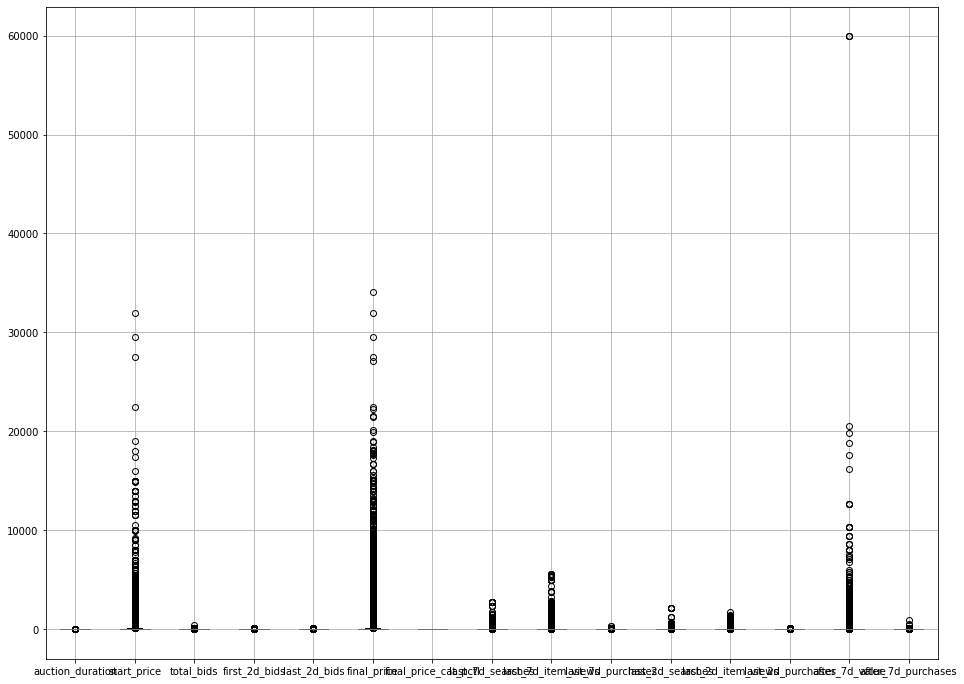

In [19]:
pd.options.display.max_colwidth = 200
rcParams['figure.figsize'] = (16,12)
df.boxplot()

In [20]:
Q1= df.describe().loc['25%']
Q3= df.describe().loc['75%']

#print(Q1-a,Q3+a)


In [21]:
df['auction_duration'].shape[0]

695729

In [22]:
for i,q in enumerate(df.select_dtypes(include=np.number)):
  th = (Q3[i]-Q1[i]) * 1.5
  up = (Q3[i]+th < df[q])
  down = (Q1[i]-th > df[q])
  print(f"{q} up: " + str(df[up].shape))
  print(f"{q} down: " + str(df[down].shape))
  print("normal shape: " + str(df['auction_duration'].shape) + "up+down / normal = " + str(float(((up.shape[0]+down.shape[0])/df[q].shape[0]))))


auction_duration up: (42464, 19)
auction_duration down: (170314, 19)
normal shape: (695729,)up+down / normal = 2.0
start_price up: (88195, 19)
start_price down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
total_bids up: (40840, 19)
total_bids down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
first_2d_bids up: (115785, 19)
first_2d_bids down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
last_2d_bids up: (48047, 19)
last_2d_bids down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
final_price up: (87366, 19)
final_price down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
final_price_cat_pctl up: (0, 19)
final_price_cat_pctl down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
last_7d_searches up: (113416, 19)
last_7d_searches down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
last_7d_item_views up: (88964, 19)
last_7d_item_views down: (0, 19)
normal shape: (695729,)up+down / normal = 2.0
last_7d_purchases up: (48144, 19)
last_7d

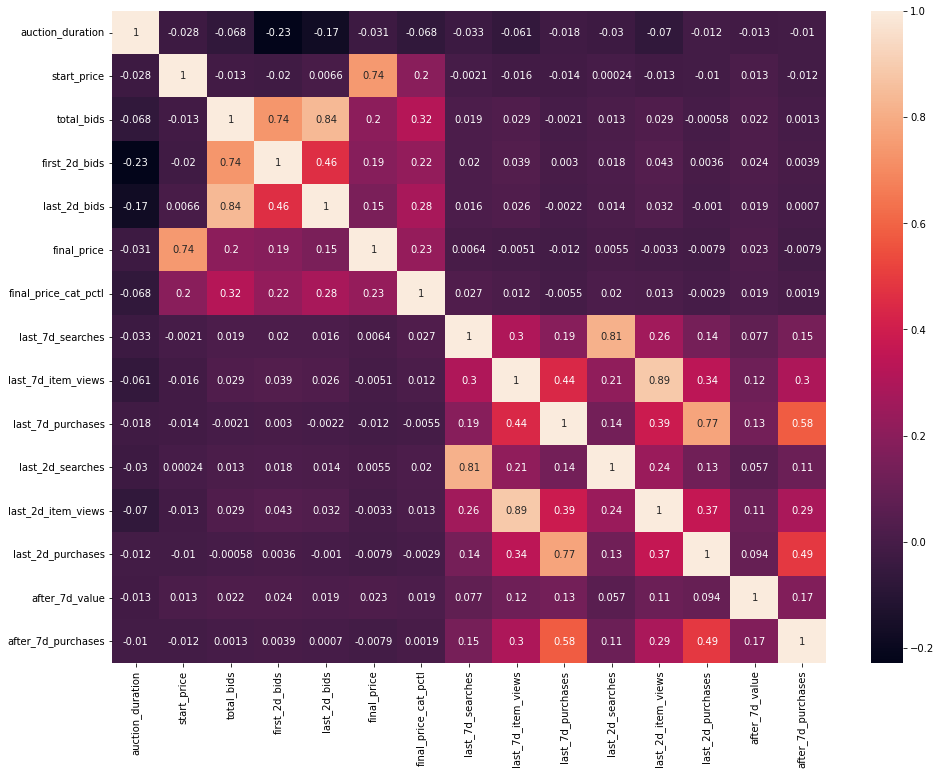

In [23]:
X = df.loc[:,'auction_duration':'after_7d_purchases']
sb.heatmap(X.corr(),annot=True)

From the heatmap above we can get the following assumptions:

- start_price is strongly and positively correlated with final_price. Which means if the start_price high final_price also high. Make sense, right?
- total_bids is strongly and positively correlated with last_2d_bids. Which basically means last_2d_bids are a part of total_bids and they go low or high together. Just like the first_2d_bids also.
- first_2d_bids and last_2d bids are correlated with value of 0.46 which is enough to say it is likely to see that the auctions that have low number of bids on first 2 days are going to have low numbers of bids on last 2 days also. Of course there will be exceptions since correlation coefficient is not so high.
- last_7d_searches is strongly and positively correlated with last_2d_searches. Which can be interpreted as sellers that make a lot of searches in the last 7 day will be again searching a lot in the last 2 day before auction ends. Those who are not searching much in the beginning are not going to magically start searching in the last 2 days. Same thing goes between last_7d_item_views and last_2d_item_views, last_7d_purchases and last_2d_purchases.
- last_7d_purchases is correlated with the after_7d_purchases with a value of 0.58. Which tells us most of the sellers are going to behave on purchases after the auction ends like they did before it ends. ***So, if a seller has purchase in 7 days before auction ends, then this is the perfect chance for us to send a buying-focused marketing message.*** Same thing goes with between last_2d_purchases and after_7d_purchases.
- Finally there is negatively correlated columns also. What does it mean? When one of them goes high in value, other one goes low. For example on the first and last 2 days of an auction if there are a lot of bids the auction is most likely to finish early.

Peki son 7 günde arama yapanlar en çok son 2 gğnde mi yapıyor gibi.

In [24]:
df.buyer_segment.value_counts()

3. Frequent Low/Mid Spenders    184372
4. Infrequent High Spenders     144452
6. Infrequent Low Spenders      128670
5. Infrequent Mid Spenders      120133
2. Frequent High Spenders        88738
1. Uber Loyals                   29364
Name: buyer_segment, dtype: int64